In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pydot
import random

In [5]:
mnist=keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


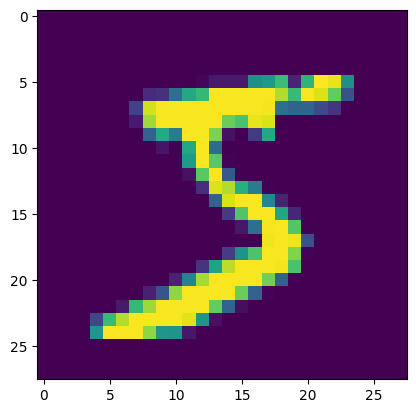

In [7]:
plt.imshow(X_train_full[0])

In [8]:
tf.keras.datasets.mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\farha_5s5ygrk\\.conda\\envs\\py37\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [9]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

In [13]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n  


In [22]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
X_train_full.shape


(60000, 28, 28)

In [26]:
model=keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
model=keras.models.load_model("C:/Users/farha_5s5ygrk/modeltrainingdata.h5")

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0441 - accuracy: 0.9885 - val_loss: 0.0752 - val_accuracy: 0.9768
Epoch 2/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0415 - accuracy: 0.9893 - val_loss: 0.0766 - val_accuracy: 0.9776
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0391 - accuracy: 0.9902 - val_loss: 0.0713 - val_accuracy: 0.9794
Epoch 4/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0367 - accuracy: 0.9908 - val_loss: 0.0711 - val_accuracy: 0.9796
Epoch 5/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0347 - accuracy: 0.9914 - val_loss: 0.0708 - val_accuracy: 0.9794
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0324 - accuracy: 0.9921 - val_loss: 0.0691 - val_accuracy: 0.9804
Epoch 7/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0306 - accuracy: 0.9930 - val_loss: 0.0716 - val_ac

In [41]:
model.save("C:/Users/farha_5s5ygrk/modeltrainingdata.h5")

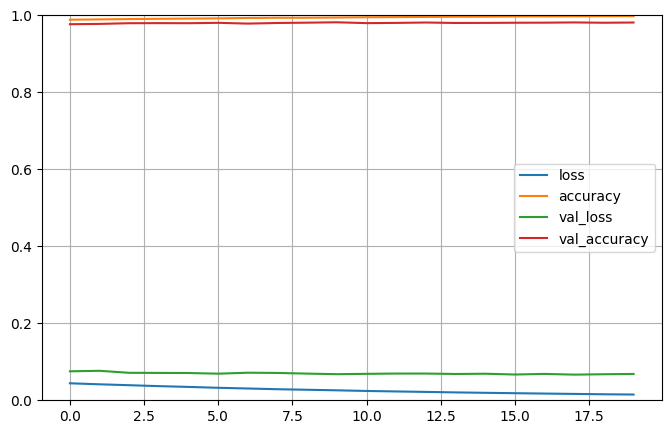

In [42]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0706 - accuracy: 0.9784


[0.07064974308013916, 0.9783999919891357]

In [44]:
X_new=X_test

In [46]:
y_prob=model.predict(X_new)
y_prob

313/313 [==============================] - 2s 6ms/step


array([[1.66272667e-08, 3.42245450e-08, 3.05830144e-06, ...,
        9.99529004e-01, 1.57726163e-06, 2.34708705e-06],
       [5.40692753e-08, 7.73592001e-06, 9.99929488e-01, ...,
        1.64526745e-13, 3.70793532e-06, 1.01866046e-14],
       [3.48253423e-07, 9.98114586e-01, 7.18365918e-05, ...,
        5.89809031e-04, 6.63174258e-04, 7.85618852e-07],
       ...,
       [4.12421789e-12, 1.38893161e-10, 1.12056501e-12, ...,
        1.35533730e-06, 3.22425180e-08, 1.34165532e-06],
       [1.92229399e-10, 3.35586212e-11, 3.18013085e-13, ...,
        1.11313056e-10, 1.91160143e-06, 1.23475855e-13],
       [3.09077137e-07, 3.03227526e-10, 7.00437511e-07, ...,
        1.30983601e-11, 5.81650450e-10, 3.39653949e-09]], dtype=float32)

In [50]:
y_pred=np.argmax(y_prob, axis=1)    

In [51]:
print("Predicted labels:", y_pred)

Predicted labels: [7 2 1 ... 4 5 6]


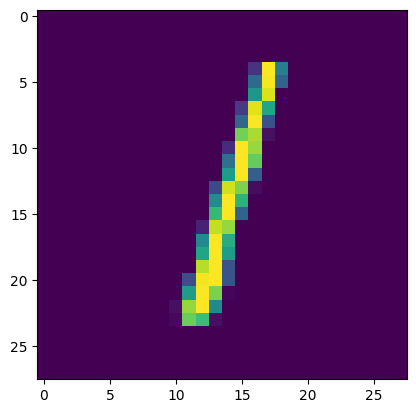

In [52]:
plt.imshow(X_test[2])

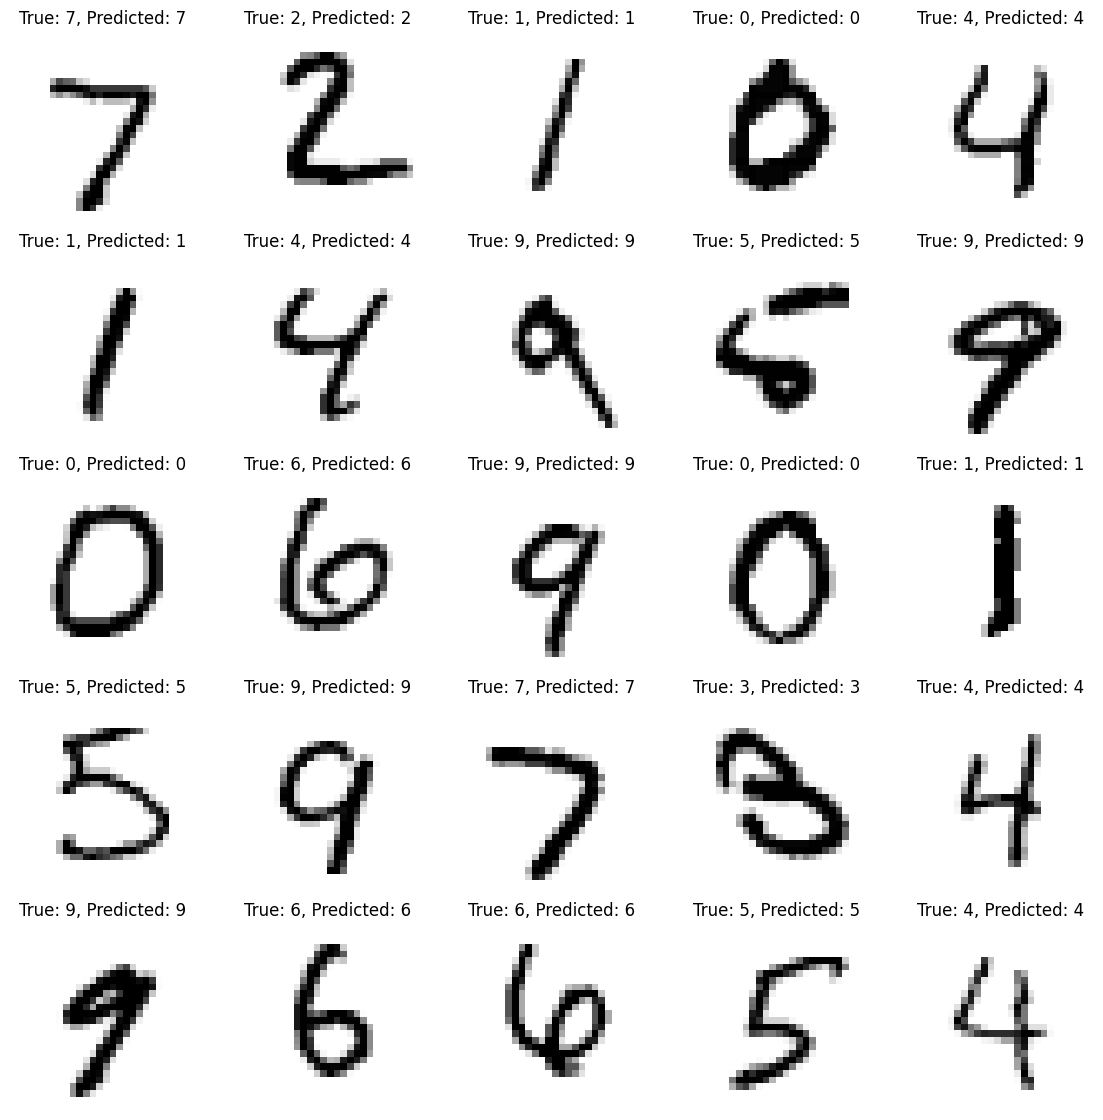

In [55]:
plt.figure(figsize=(14,14))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap="binary")
    plt.axis('off')
    plt.title(f"True: {y_test[i]}, Predicted: {y_pred[i]}")
plt.show()